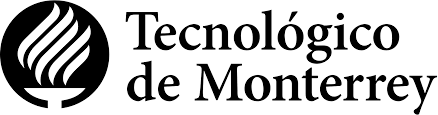

# <center>Actividad Semanal 5: Repaso Transformación y reducción de dimensiones</center>
## Ciencia y Analítica de datos
## Profesor Titular: María de la Paz Rico Fernández
## _Maestría en Inteligencia Artificial Aplicada (MNA-V)_

### 27/10/2022
#### _Andrés Eduardo Figueroa García - A01378536_

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [58]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(np.dot(W,D),Winv) 
B = np.real(B)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [60]:
#Matriz 1
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

B = np.dot(np.dot(W,D),Winv)
B = np.real(B).round(decimals=2)

print("--------- Matriz original ---------")
print(A)
print("-----------------------------------")
print("----- Eigen Vectors & Values ------")
print(values) #D
print(vectors) #W
print("------- Matriz reconstruida -------")
print(B)
print("-----------------------------------")

--------- Matriz original ---------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------------
----- Eigen Vectors & Values ------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
------- Matriz reconstruida -------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------------


In [61]:
#Matriz 2
A = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
values, vectors = eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

B = np.dot(np.dot(W,D),Winv)
B = np.real(B).round(decimals=2)

print("--------- Matriz original ---------")
print(A)
print("-----------------------------------")
print("----- Eigen Vectors & Values ------")
print(values) #D
print(vectors) #W
print("------- Matriz reconstruida -------")
print(B)
print("-----------------------------------")

--------- Matriz original ---------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------------
----- Eigen Vectors & Values ------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
------- Matriz reconstruida -------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------------


In [62]:
#Matriz 3
A = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
values, vectors = eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)

B = np.dot(np.dot(W,D),Winv)
B = np.real(B).round(decimals=2)

print("--------- Matriz original ---------")
print(A)
print("-----------------------------------")
print("----- Eigen Vectors & Values ------")
print(values) #D
print(vectors) #W
print("------- Matriz reconstruida -------")
print(B)
print("-----------------------------------")

--------- Matriz original ---------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------------
----- Eigen Vectors & Values ------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
------- Matriz reconstruida -------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------------


#### **Comentario**
Al momento de obtener los eigenvectores y eigenvalores, resultó en algunas ocasiones que se mostraban número complejos, cuando la matriz original estaba compuesta con puros elementos enteros. En este sentido, al analizar la parte imaginaria, era evidente que esta no era representativa, ya que se encontraba en el orden de $10^{-15}$, pero de culalquier forma podría generar confusión en la forma en que los resultados era representados.

Por otro lado, la parte real de los números complejos a veces estaba igual en el orden de $10^{-12}$, por lo que se optó por remover estos número decimales no representativos para los resultados que se esperaba obtener.

Una solución que ataca ambos prorblemas fue agregar la línea

B = np.real(B).round(decimals=2)

La cual, ayuda en eliminar la parte imaginaria de los resultados mostrados en la matriz, al mismo tiempo que evita la presencia de decimales resultados.

Esto en términos del ejercico realizado, lo podría interpretar como que debido a las operaciones algebraicas que a veces se llevan a cabo como parte de PCA, pueden algunos resultados contener valores que son inesperados y pueden no favorecer el correcto análisis de los resultados obtenidos. No sé si las librerías utilizadas tengan esto en cuenta, pero en caso de desarrollarlo a mano, es algo a considerar.

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


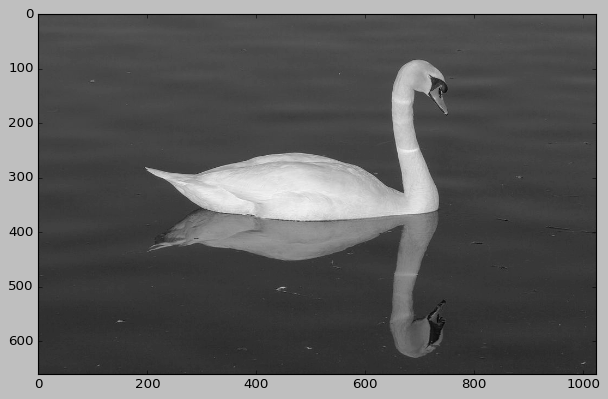

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FB5DFCED790>


In [7]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [8]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [9]:
U.shape

(660, 660)

In [10]:
V.shape

(1024, 1024)

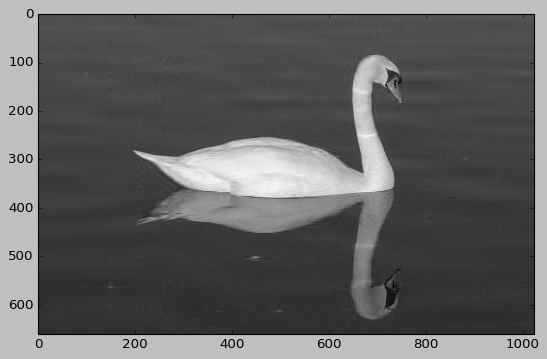

Felicidades la imagen está comprimida


In [18]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

#### **Procedimiento**
El prodecimiento a a llevar a cabo en la compresión de las 3 imágenes solicitadas incluye los siguientes pasos:

1. Seleccionar una imagen y obtener el link de la misma.
2. Importar la imgane y convertirla bajo el parámetro 'LA'
3. Convertir la imagen en un arreglo tipo lista con punto flotante.
4. Mostrar el tamaño de la imagen a utilizar.
5. Mostrar la imagen a utilizar.
6. Obtener los valores de U, D y V que se  obtiene de aplicar la función SVD de Numpy.
7. Definir un valor para realizar la compresión, modificando las dimensiones de U, D y V.
8. Mostrar la imagen después de haberla comprimido.
9. Validar si la calida de la imagen comprimida es buena comparada con la original.
10. Probar con distintos valores hasta obtener una calidad deseable.

(406, 271)


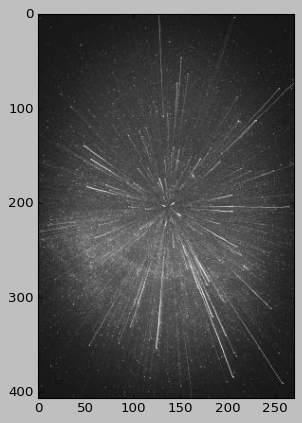

(271,)


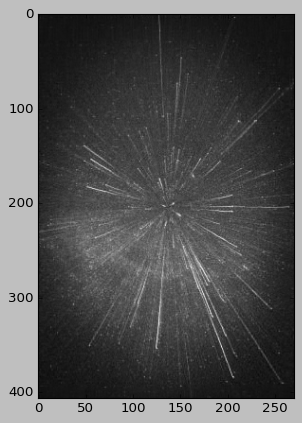

Felicidades la imagen está comprimida


In [64]:
#imagen 1
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/11/destino-casualidad-271x406.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)
imgmat.shape = (imggray.size[1],imggray.size[0])
print(imgmat.shape)

plt.imshow(imgmat,cmap='gray')
plt.show()

U,D,V = np.linalg.svd(imgmat)
print(D.shape)

nvalue = 100
#=U(406X100)(100X100)(100X271)
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

(512, 768)


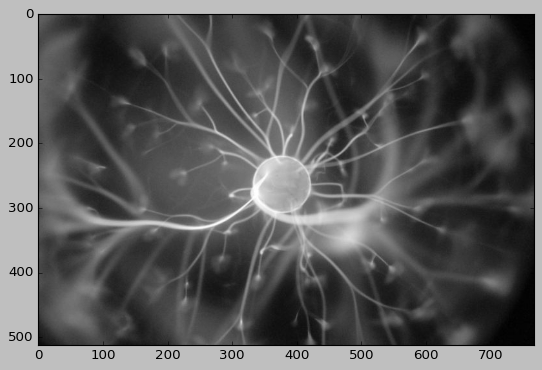

(512,)


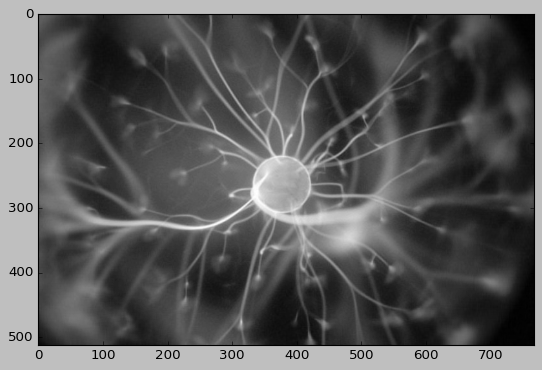

Felicidades la imagen está comprimida


In [55]:
#imagen 2
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2019/03/alma-ciencia-768x512.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

imgmat.shape = (imggray.size[1],imggray.size[0])
print(imgmat.shape)

plt.imshow(imgmat,cmap='gray')
plt.show()

U,D,V = np.linalg.svd(imgmat)
print(D.shape)

nvalue = 130
#=U(512X130)(130X100)(130X768)
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

(235, 301)


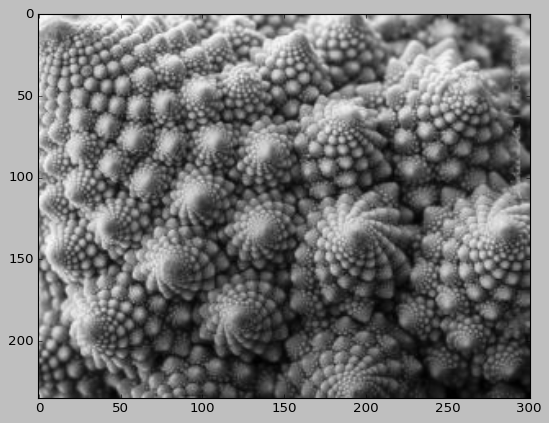

(235,)


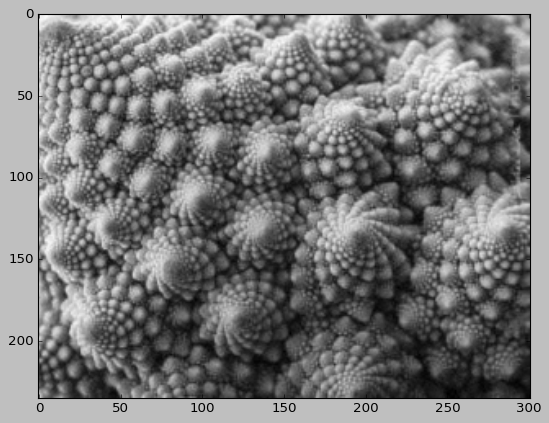

Felicidades la imagen está comprimida


In [56]:
#imagen 3
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2014/10/romanesco-301x235.jpg')).convert('LA')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

imgmat.shape = (imggray.size[1],imggray.size[0])
print(imgmat.shape)

plt.imshow(imgmat,cmap='gray')
plt.show()

U,D,V = np.linalg.svd(imgmat)
print(D.shape)

nvalue = 110
#=U(235X110)(110X110)(110X301)
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

#### **Comentario**
Utilizar SVD para la compresión de imágenes hacienod un simil con lo que son los PCs, me parece que es muy bueno en cuanto a que nos permite tener una idea clara de qué pasa cuando se están teniendo en cuenta menos elementos y el impacto que tiene en nuestros datos. 

SVD descompone la matriz 2D que tenemos como resultado de la imagen y esto nos permite tomar en cuenta la cantidad de elementos que nosotros veamos convenientes conforme al resultado visual de la imagen. En este sentido, no hay una cantidad universal de datos que pudiéramos tomar y tampoco era proporcional al tamaña original de la imagen. En el primer caso donde presento una imagen de estrellas, al ser una imagen con negro casi en su totalidad y con sólo unos destellos de blanco, la compresión se pudo realizar con casi la tercer parte del total de elementos. Por otro lado, las siguientes dos imagenes que mostraban unas neuronas y fractales, al tener mucho más detalle y contrastes, la compresión se pudo realizar tomando menos elementos proporcionalmente hablando que con el primer ejemplo.

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




Importamos las librerías a utilizas y cargamos el DataSet de Iris, al mismo tiempo que se aplica una escalación estandar y se establece un PCA de 2 elementos. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

Con los resultados de las transformaciones mencionadas anteriormente, se grafican los datos antes y posterior a las transformaciones. Se puede apreciar que el PCA hizo que los elementos quedaran mejor distribuídos.

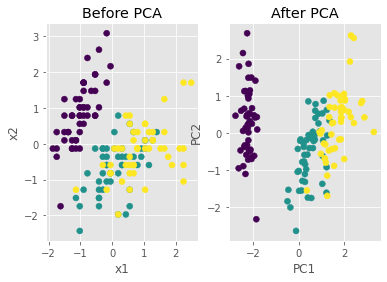

In [11]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Imrpimimos la razón de varianza de cada uno de los PCs para el PCA

In [3]:
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


Obtemenos la covarianza entre los PCs que resultaron del PCA

In [5]:
np.cov(X_new.T)
# array([[2.93808505e+00, 4.83198016e-16],
#        [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

Se imprime el valor de varianza entre los PCs del PCA

In [7]:
pca.explained_variance_
# array([2.93808505, 0.9201649 ])

array([2.93808505, 0.9201649 ])

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. Cada fila corresponde a un PC con los distintos features que se involucran en este.

In [12]:
print(abs( pca.components_ ))
# [[0.52106591 0.26934744 0.5804131 0.56485654]
#  [0.37741762 0.92329566 0.02449161 0.06694199]]

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Se realiza una función en Python para poder visualizar un análisis de PCA con biplots

In [13]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

Se importa matplotlib para mostrar el gráfico y se aplica la función descrita previamente para realizar el análisis.

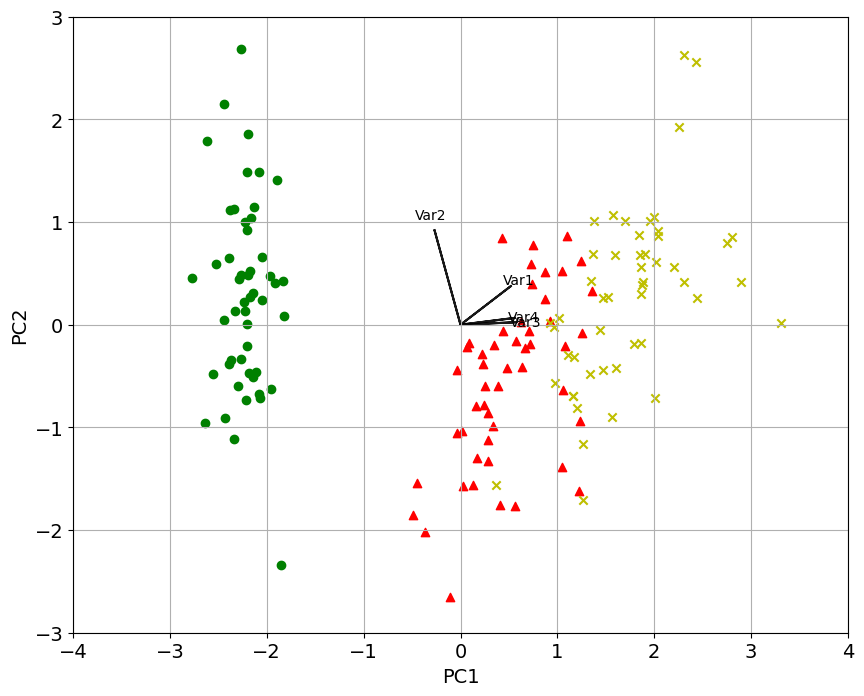

In [14]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Esta gráfica ayuda a confirmar de manera visual que los elementos 1,2 y4 son los más representativos en para el PC1, mientras que los elementos 1 y 2 son los más importantes para el PC2. Esto se sabe debido a la dirección en que apuntan las flechas.

Para comprobar esto, se pueden obtener las correlaciones entre la variable 3 y 4, así como 2 y 3.

In [16]:
# Var 3 and Var 4 are extremely positively correlated
print(np.corrcoef(X[:,2], X[:,3])[1,0])
# 0.9628654314027957
# Var 2and Var 3 are negatively correlated
print(np.corrcoef(X[:,1], X[:,2])[1,0])
# -0.42844010433054014

0.9628654314027957
-0.42844010433054014


Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

* ¿Qué es feature importance y para que nos sirve?

R: El feature importance es el proceso que nos sirve para determinar la importancia de un elemento para el modelo o, en este caso de PCA en específico, para uno de los componentes principales. Esto nos sirve para poder determinar aquellos elementos que tienen un mayor impacto para lo que queremos hacer y, posteriormente, eliminar aquellos que no son de nuestro interes o que pueden llegar a ser redundantes. Esto es especialmente importante, porque a una mayor cantidad de elementos a tener en cuenta para un modelo de aprendizaje automático o aprendizaje profundo, se vuelve más costoso computacionalmente hablando y esto lleva a que el tiempo de procesamiento sea mayor. Adicional a esto, el tener un elemento que está fuertemente correlacionado con otro, puede llegar a viciar los modelos, lo cual no es conveniente.

* ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

R: Teniendo en cuenta toda la actividad de esta semana, resaltaría la interpretación gráfica de lo que están haciendo procesamientos como PCA y SVD, ya que al haberlo realizado únicamente con un conjunto grande de elementos, esta parte había quedado algo abstracta. En otras palabras, comprendía lo que hacía PCA a un nivel práctico, pero no identificaba el fenómeno en términos de vectores o una representación 2D/3D.

* ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

R: Este conocimiento me sería de utilidad al momento de correr un modelo de aprendizaje automático, ya que reducir el número de elementos que se introducirán a el modelo puede tener varias ventajas en términos de tiempo y calidad de resultados. En un panorama más cercano a mi trabajo diario, creo que podría utilizarlo cuando tenga que presentar resultados del comportamiento de un Drive en términos de temperatura o corriente, pero relacionado con el tiempo de trabajo, número de ciclos, temperatura del ambiente, carga con la que trabaja el motor, etc. pero resumiento los fenómenos para que el análisis pueda ser más claro ante la audiencia.